# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다.(하나의 dataset에 하나의 결과를 받는다) 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 텐서를 입력 받고 출력하는 형식으로 모델을 구현한다.
    - 코드상에서는 Layer를 입력받는 형식으로 작성한다.


```python
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(1, activation='sigmoid')(dense)  # 바로 전의 레이어를 입력받는 형식// 실제는 전의 레이어를 통과한 아웃풋 값

model = models.Model(input_tensor, output_tensor)
```

In [9]:
class Test:
    def __init__(self,name):
        self.name = name
        
    def __call__(self): #객체를 함수처럼 호출 할수 있게 해준다. --> "스페셜 메서드"다..// 객체를 함수처럼 호출하면 작동됨..
        print("__call__",self.name)
        
    def m(self):
        print('M')

In [11]:
t = Test('홍길동') # 클래스의 객체

In [13]:
Test('홍길동')()  # t = Test('홍길동') 이니까 t()처럼 Test('홍길동')() 이것도 가능~!

__call__ 홍길동


In [12]:
t() 
# 함수처럼 사용됨.. // 객체를 불렀는데 __call__이 작동됨... // 이런 역할을 하는게 '특수메서드=매직메서드'이다.
#def __call__(self):  이게 작동한거임..
        #print(self.name)

__call__ 홍길동


In [7]:
t.m(), t.name

M


(None, '홍길동')

In [ ]:
# 예를 들면 Dense(layer)() --> 이런식으로되면  작동하는 ... 매직메서드...?

## Sequential, Functional API 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

### Sequential

In [2]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape =(32,32,3)))
seq_model.add(layers.Conv2D(filters = 64, kernel_size = 3,padding = 'same' ,activation = 'relu'))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(units = 256, activation = 'relu'))
seq_model.add(layers.Dense(units = 10, activation = 'softmax', name = 'outputlayer'))
seq_model.summary() # 인풋은 입력에 대한 것만 처리 되서 ... 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16777472  
_________________________________________________________________
outputlayer (Dense)          (None, 10)                2570      
Total params: 16,781,834
Trainable params: 16,781,834
Non-trainable params: 0
_________________________________________________________________


### Functional

In [3]:
input_tensor = layers.Input(shape = (32,32,3)) # 레이어를 지나며 처리된 결과(output)가 input_tensor 로 들어간다. 다른 것들도 마찬가지~!
conv_tensor = layers.Conv2D(filters = 64, kernel_size = 3,padding = 'same' ,activation = 'relu')(input_tensor)
pool_tensor = layers.MaxPool2D(padding= 'same')(conv_tensor) # pooling된것을 그려서 확인가능 

flatten_tensor = layers.Flatten()(pool_tensor) # 처리된 결과들이 들어가는거다


dense_tensor = layers.Dense(units = 256, activation = 'relu')(flatten_tensor)
dense_tensor2 = layers.Dense(units = 128)(dense_tensor)

bn_tensor= layers.BatchNormalization()(dense_tensor2)
relu_tensor = layers.ReLU()(bn_tensor)

output_tensor = layers.Dense(units = 10, activation = 'softmax')(relu_tensor)

# 레이어자체가 아니라 레이어를 통해 나온 실제 출력값들을 변수에 넣는것이다. // 레이어가아니라.. 
# 네트웍을 다 만든다음에 마지막에 모델을 만든다.............
# 입력값과 출력값이 여러개 일때는 리스트로 묶어서 넣어주면 된다.

#모델 학습후 fn_m.perdict(X)를 했을때 // 변수명을 검색하면 실제 그 layer를 통과한 결과값(특성)을 조회 할 수 있고 그래프를 그려서 확인도 가능하다.
fn_m = models.Model(input_tensor,output_tensor) # (입력텐서, 출력텐서)

fn_m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512   

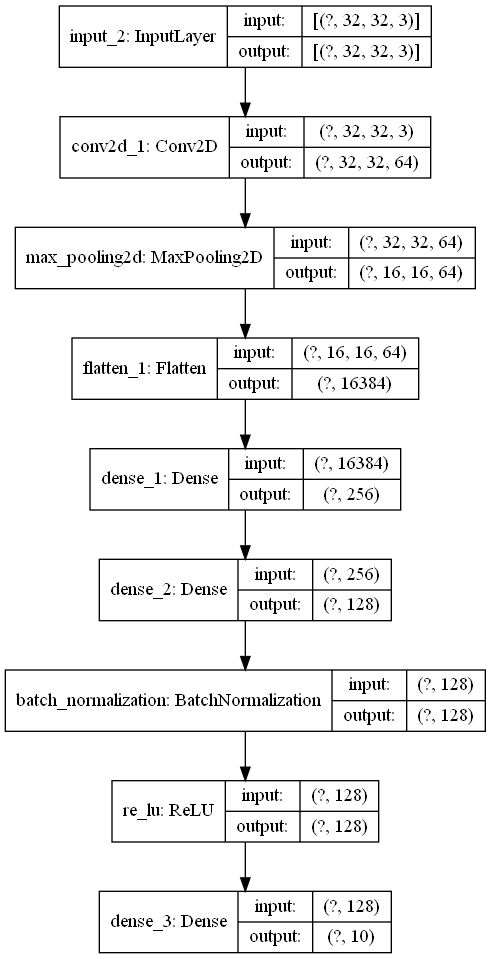

In [4]:
keras.utils.plot_model(fn_m, show_shapes= True)

In [35]:
#  각각의 레이어를 통해 나온 결과값을 보지 않아도 될때는 그냥 변수값을 x 로 다똑같이 준다
#  재사용하지 않을것이라면 그냥 변수명 다 똑같이 주는게~~! 인풋과 아웃풋은 모델 만들때 써야해서 ㄴㄴ안됨.


input_tensor = layers.Input(shape = (32,32,3)) # 레이어를 지나며 처리된 결과(output)가 input_tensor 로 들어간다. 다른 것들도 마찬가지~!
x = layers.Conv2D(filters = 64, kernel_size = 3,padding = 'same' ,activation = 'relu')(input_tensor)
x = layers.MaxPool2D(padding= 'same')(x) # pooling된것을 그려서 확인가능 

x = layers.Flatten()(x) # 처리된 결과들이 들어가는거다


x = layers.Dense(units = 256, activation = 'relu')(x)
x = layers.Dense(units = 128)(x)

x= layers.BatchNormalization()(x)
x = layers.ReLU()(x)

output_tensor = layers.Dense(units = 10, activation = 'softmax')(x)


fn_m = models.Model(input_tensor,output_tensor) # (입력텐서, 출력텐서)

fn_m.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               4194560   
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512 

## 레이어를 합치는 함수
- 기준축을 제외한 나머지는 똑같아야 합칠 수 있잖아~~~~~~~~~~~~~
- concatenate(list, axis=-1)
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- 얘네는 shape 이 아예 똑같아야 가능하다~~~~~~~~~~~~~~
- add(list), substract(list), multiply(list)
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [39]:
# Residual block// add 함수 사용
input_tensor = layers.Input((32,32,3))
x = layers.Conv2D(filters = 64, kernel_size= 3, padding ='same', activation = 'relu')(input_tensor)
x1 = layers.Conv2D(filters = 64, kernel_size= 3, padding ='same')(x)
b1 = layers.BatchNormalization()(x1)

add1 = layers.add([x,b1])
r = layers.ReLU()(add1)

r_block_model = models.Model(input_tensor,r)


In [40]:
r_block_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 32, 32, 64)   1792        input_16[0][0]                   
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_18[0][0]                  
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 32, 32, 64)   256         conv2d_19[0][0]                  
____________________________________________________________________________________________

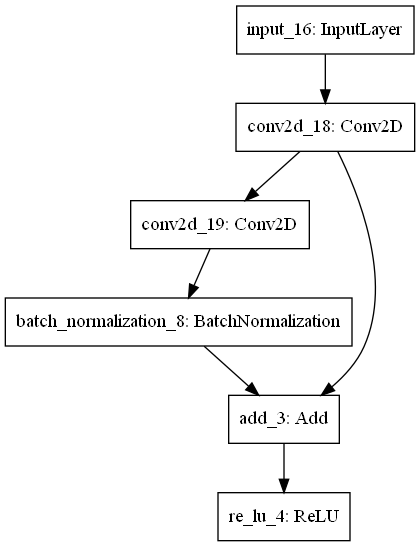

In [41]:
keras.utils.plot_model(r_block_model)

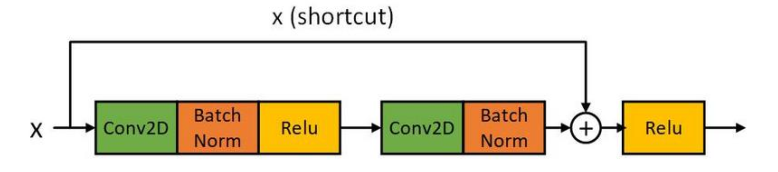

In [5]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\playdata\anaconda3\envs\tf2\lib\site-packages
Requires: joblib, scipy, numpy, threadpoolctl
Required-by: 


### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

X,y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [18]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [19]:
y1 = X[:, 2] # 꽃잎 너비
y2 = X[:, 3] # 꽃잎 높이
y3 = y       # 품종


X= X[:,[0,1]]

In [20]:
X.shape, y1.shape,y2.shape, y3.shape  # 출력 3개 값

((150, 2), (150,), (150,), (150,))

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
# 네트웍 구조를 중심으로 이해하기

input_tensor = layers.Input((2, )) # 1개의 데이터 형태/ X가 데이터니까 X의 shape을 넣어줘야함~!
x = layers.Dense(units = 16, activation = 'relu')(input_tensor)
x = layers.Dense(units = 8, activation ='relu')(x)

output1 = layers.Dense(units= 1, name='patal_width_output')(x) #꽃잎 너비 예측 (regression : units =1, activation 없음)
output2 = layers.Dense(units = 1, name='patal_length_output')(x) # 꽃잎 높이 예측   ( regression : units =1, activation 없음  )                    )
output3 = layers.Dense(units = 3, activation = 'softmax' ,name ='species_output')(x) # 품종 예측 (다중분류 : unit:class개수 (3개), activation ='softmax')

model = models.Model(input_tensor, [output1,output2,output3]) # Model(input, output) 인풋,아웃풋이 여러개 일때 list묶는다.

In [25]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 16)           48          input_8[0][0]                    
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 8)            136         dense_14[0][0]                   
__________________________________________________________________________________________________
patal_width_output (Dense)      (None, 1)            9           dense_15[0][0]                   
____________________________________________________________________________________________

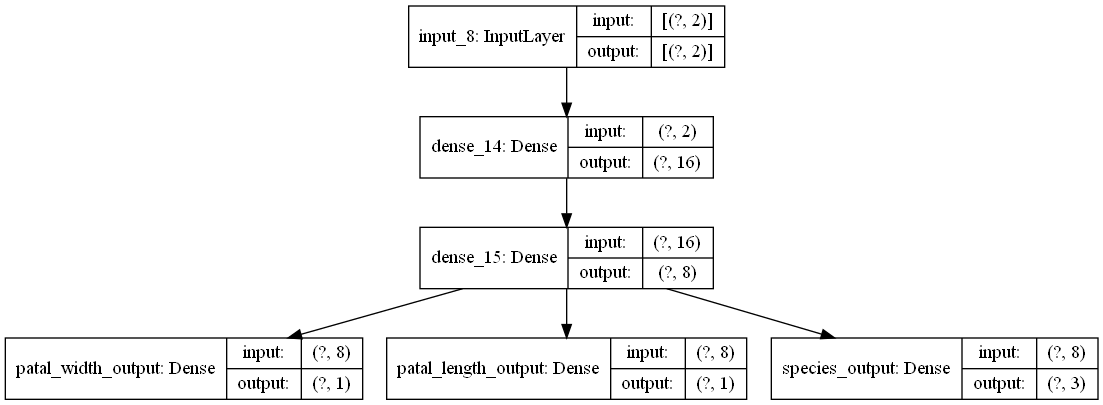

In [27]:
keras.utils.plot_model(model, show_shapes =True)

In [29]:
#compile
model.compile(optimizer = 'adam', 
              loss = ['mse', 'mse', 'sparse_categorical_crossentropy'], #출력이 3개 - 각각의 쌓은 순서대로 loss를 리스트로 묶어서 제공
              # 역전파를 통해 weight를 업데이트 할때는 위 세개의 loss의 총 합계를 갖고 한다. 
             ) # 출력이 여러개 일때는 metrics를 주기어렵다... 못준다?

In [30]:
history = model.fit(X,[y1,y2,y3],  #X , y는 여러개니까 list로 주면된다.// loss순서대로  넣어줘야한다. 
                   epochs = 100,
                   validation_split = 0.1,
                   )

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 1s 8ms/sample - loss: 24.3664 - patal_width_output_loss: 21.0925 - patal_length_output_loss: 0.6133 - species_output_loss: 1.6183 - val_loss: 41.8564 - val_patal_width_output_loss: 37.2270 - val_patal_length_output_loss: 1.6719 - val_species_output_loss: 2.9575
Epoch 2/100
135/135 [==============================] - 0s 185us/sample - loss: 22.6878 - patal_width_output_loss: 20.2070 - patal_length_output_loss: 0.4930 - species_output_loss: 1.7426 - val_loss: 38.9978 - val_patal_width_output_loss: 34.7026 - val_patal_length_output_loss: 1.3990 - val_species_output_loss: 2.8961
Epoch 3/100
135/135 [==============================] - 0s 199us/sample - loss: 20.9124 - patal_width_output_loss: 17.8036 - patal_length_output_loss: 0.5104 - species_output_loss: 1.6632 - val_loss: 35.6220 - val_patal_width_output_loss: 31.6189 - val_patal_length_output_loss: 1.2291 - val_species_output_loss: 2.7741


Epoch 27/100
135/135 [==============================] - 0s 177us/sample - loss: 4.8444 - patal_width_output_loss: 3.1349 - patal_length_output_loss: 0.4506 - species_output_loss: 1.3713 - val_loss: 5.6775 - val_patal_width_output_loss: 3.9686 - val_patal_length_output_loss: 0.8847 - val_species_output_loss: 0.8242
Epoch 28/100
135/135 [==============================] - 0s 199us/sample - loss: 4.7555 - patal_width_output_loss: 2.9451 - patal_length_output_loss: 0.4240 - species_output_loss: 1.4038 - val_loss: 5.3748 - val_patal_width_output_loss: 3.6629 - val_patal_length_output_loss: 0.8761 - val_species_output_loss: 0.8358
Epoch 29/100
135/135 [==============================] - 0s 185us/sample - loss: 4.6836 - patal_width_output_loss: 2.8714 - patal_length_output_loss: 0.4140 - species_output_loss: 1.3840 - val_loss: 5.1420 - val_patal_width_output_loss: 3.4115 - val_patal_length_output_loss: 0.8787 - val_species_output_loss: 0.8518
Epoch 30/100
135/135 [==============================

Epoch 53/100
135/135 [==============================] - 0s 192us/sample - loss: 4.2245 - patal_width_output_loss: 2.7352 - patal_length_output_loss: 0.4212 - species_output_loss: 1.1104 - val_loss: 4.4563 - val_patal_width_output_loss: 2.3105 - val_patal_length_output_loss: 0.8763 - val_species_output_loss: 1.2695
Epoch 54/100
135/135 [==============================] - 0s 199us/sample - loss: 4.2199 - patal_width_output_loss: 2.7684 - patal_length_output_loss: 0.4566 - species_output_loss: 1.1197 - val_loss: 4.5235 - val_patal_width_output_loss: 2.3393 - val_patal_length_output_loss: 0.8979 - val_species_output_loss: 1.2863
Epoch 55/100
135/135 [==============================] - 0s 163us/sample - loss: 4.2134 - patal_width_output_loss: 2.6589 - patal_length_output_loss: 0.4146 - species_output_loss: 1.1134 - val_loss: 4.5658 - val_patal_width_output_loss: 2.3612 - val_patal_length_output_loss: 0.9076 - val_species_output_loss: 1.2970
Epoch 56/100
135/135 [==============================

Epoch 79/100
135/135 [==============================] - 0s 199us/sample - loss: 4.0814 - patal_width_output_loss: 2.5838 - patal_length_output_loss: 0.4047 - species_output_loss: 1.1066 - val_loss: 4.5690 - val_patal_width_output_loss: 2.3272 - val_patal_length_output_loss: 0.9292 - val_species_output_loss: 1.3126
Epoch 80/100
135/135 [==============================] - 0s 199us/sample - loss: 4.0774 - patal_width_output_loss: 2.5246 - patal_length_output_loss: 0.4274 - species_output_loss: 1.1157 - val_loss: 4.6283 - val_patal_width_output_loss: 2.3688 - val_patal_length_output_loss: 0.9332 - val_species_output_loss: 1.3262
Epoch 81/100
135/135 [==============================] - 0s 185us/sample - loss: 4.0740 - patal_width_output_loss: 2.3969 - patal_length_output_loss: 0.3852 - species_output_loss: 1.1198 - val_loss: 4.6114 - val_patal_width_output_loss: 2.3694 - val_patal_length_output_loss: 0.9046 - val_species_output_loss: 1.3375
Epoch 82/100
135/135 [==============================

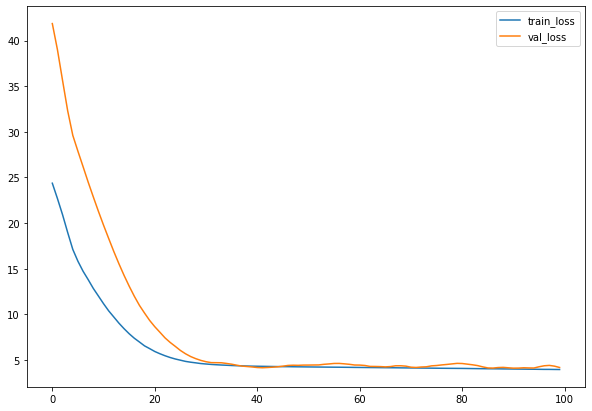

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')


plt.legend()
plt.show()

In [32]:
model.evaluate(X, [y1,y2,y3])
# [총loss, output1 loss, output2 loss, output3 loss]

150/150 [==============================] - 0s 65us/sample - loss: 3.9704 - patal_width_output_loss: 2.3976 - patal_length_output_loss: 0.4506 - species_output_loss: 1.1433


[3.970399513244629, 2.3976216, 0.45064193, 1.143337]

In [34]:
# 추론
model.predict(X[:2])


[array([[3.5112286],
        [3.2630234]], dtype=float32),
 array([[1.0498918 ],
        [0.98989916]], dtype=float32),
 array([[0.33804464, 0.36398426, 0.29797113],
        [0.33922246, 0.36671227, 0.29406518]], dtype=float32)]

In [38]:
y1[:2], y2[:2] , y3[:2]

(array([1.4, 1.4]), array([0.2, 0.2]), array([0, 0]))

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

In [41]:
iris_info_tensor = layers.Input((4, ))
x1 = layers.Dense(32, activation ='relu')(iris_info_tensor)
x1= layers.Dense(16, activation= 'relu')(x1)

iris_image_tensor = layers.Input((16,16,1))
x2 = layers.Conv2D(filters = 32, kernel_size =(3,3), padding ='same', activation = 'relu')(iris_image_tensor)
x2 = layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation ='relu')(x2)
x2 = layers.MaxPool2D(padding ='same')(x2)

x3 = layers.Conv2D(filters = 64, kernel_size =(3,3), padding ='same', activation = 'relu')(x2)
x3 = layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation ='relu')(x3)
x3 = layers.MaxPool2D(padding ='same')(x3)
x3 = layers.GlobalAveragePooling2D()(x3)

# 두개를 합치기

x4 = layers.concatenate([x1,x3]) # 어차피 두개다 1차원이라 axis를 따로 지정하지않아~~!// add는 안됨.. 
x5 = layers.Dropout(0.2)(x4)
output_tensor = layers.Dense(units = 3, activation = 'softmax')(x5)

model = models.Model([iris_info_tensor, iris_image_tensor], output_tensor)



In [42]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 16, 16, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 16, 16, 32)   320         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 16, 16, 32)   9248        conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 8, 8, 32)     0           conv2d_9[0][0]                   
____________________________________________________________________________________________

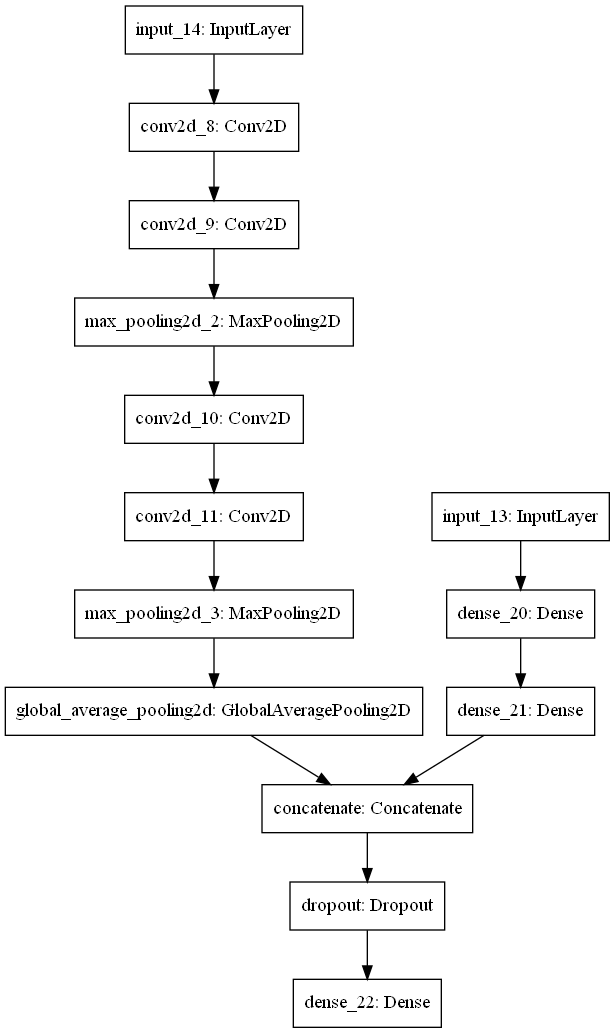

In [44]:
keras.utils.plot_model(model)

In [45]:
model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy', # 입력값이 2개라도 어차피 합쳐져서 out이 하나로 나오니까..
             metrics =['accuracy'])

In [ ]:
# model.fit([x_infor,x_imag],y) 이런식으로 넣어줘야함.